# CNN architecture to implement the image classification task over MNIST dataset

## Database
* The data that will be incorporated is the **MNIST database** which contains 60,000 images for training and 10,000 test images.
* The dataset consists of small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
* The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [1]:
from tensorflow import keras
from keras.datasets import mnist     # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


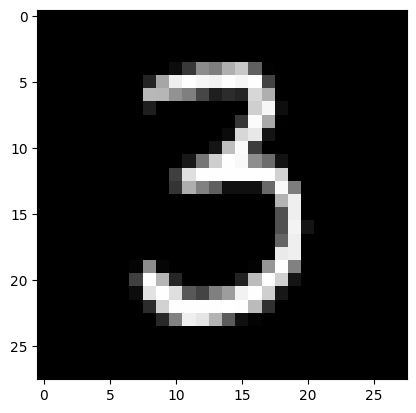

In [2]:
# Visualize any random image
import matplotlib.pyplot as plt
i=50
plt.imshow(X_train[i], cmap='gray');

### Formatting the Input

`.reshape(60000, 28, 28, 1)` reshapes the training dataset X_train from a 3D array (60000, 28, 28) to a 4D array (60000, 28, 28, 1). This is necessary because convolutional layers in a CNN expect input data to have a certain shape, typically in the form (batch_size, height, width, channels). In this case, the images are grayscale, so they only have one channel.

`.astype('float32')` to convert the data type of the training dataset to float32. Neural networks often perform better with floating-point numbers, and this conversion ensures consistency in data type.
X_test = X_test.astype('float32'): Similar to the previous line, this line converts the data type of the testing dataset to float32.

`/= 255` performs min-max normalization on the training dataset X_train. It divides each pixel value by 255, the maximum pixel value for grayscale images. This operation scales the pixel values to the range [0, 1], making the neural network easier to train.

In [3]:
# Single-channel input data (grey-scale)
# First apply convolutions then flatten

X_train = X_train.reshape(60000, 28, 28, 1) # single-channel input
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # min-max normalization
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


# Convolutional Neural Network

   - CNNs are a class of deep neural networks designed for processing and analyzing visual data, especially images.
   - They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

1. **Convolution Operation:**
   - Convolution is a key operation in CNNs that involves applying filters (kernels) to input data, typically images.
   - Kernels traverse through the input image, extracting local features and producing feature maps.
   - Each kernel specializes in detecting specific patterns or features, such as edges, textures, or more complex structures.

2. **Feature Maps:**
   - Feature maps are the output of the convolutional operation. They represent the presence of learned features in the input data.
   - Multiple convolutional layers can be stacked to learn hierarchical representations of visual features.

3. **Learning Different Characteristics:**
   - Each kernel in a CNN is responsible for learning different characteristics or features of the input data.
   - The first layers may capture basic features like edges, while deeper layers can learn more abstract and complex features.

4. **Max Pooling:**
   - Max pooling is a down-sampling operation often used in CNNs to reduce the spatial dimensions of the feature maps.
   - It helps in reducing the number of learnable parameters, thus decreasing computational cost and memory requirements.
   - Max pooling retains the most significant information by selecting the maximum value from a group of values in the input.

5. **Benefits of CNNs:**
   - CNNs are well-suited for image-related tasks due to their ability to automatically learn spatial hierarchies of features.
   - They have shown exceptional performance in tasks such as image classification, object detection, and image segmentation.

6. **Transfer Learning:**
   - CNNs, particularly pre-trained models, can be used for transfer learning, where a model trained on a large dataset for one task is fine-tuned for a different but related task.
   - This helps leverage knowledge gained from large datasets and accelerates training on smaller datasets.

7. **Applications:**
   - CNNs find applications in various domains, including computer vision, medical imaging, autonomous vehicles, and more.


## Building a Convolutional Neural Network

In [4]:
from keras import backend as K
from keras import __version__

print('Using Keras version:', __version__, 'backend:', K.backend())

Using Keras version: 3.0.5 backend: tensorflow


In [5]:
# import cnn layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow as tf

**2D convolution layer** creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

`Conv2D` indicates a 2D convolutional layer. Convolutional layers are commonly used in image processing tasks in neural networks.

1. *Activation Function:*
An activation function is a mathematical operation applied to each node (or neuron) in a neural network, introducing non-linearity to the network. This non-linearity is essential for the neural network to learn complex patterns and relationships in the data. *In other words, activation functions determine the output of a neuron given its input.*
    - ReLU (Rectified Linear Unit): The activation function introduces non-linearity to the model. ReLU is a commonly used activation function that outputs the input directly if it is positive, and zero otherwise. Mathematically, it is defined as f(x)=max(0,x). ReLU is often preferred because it helps the model learn faster and can mitigate the vanishing gradient problem.
    - Softmax: Softmax is an activation function used in the output layer of a neural network for multi-class classification problems. It converts a vector of raw scores (logits) into probabilities. The output values of the softmax function represent the probabilities of each class, and they sum up to 1.

2. *Padding:*
Padding is the process of adding extra layers of pixels around the input data. It is typically done to ensure that the convolution operation can be applied to the edges of the input without losing information. There are two common types of padding:
    - Valid Padding (No Padding): No extra pixels are added. The convolution operation is only applied to positions where the entire filter fits within the input.
    - Same Padding: Padding is added to the input so that the output has the same spatial dimensions as the input. This is achieved by adding zeros around the input.

3. *Strides:*
Stride refers to the step size the convolutional filter takes when sliding over the input data. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 means the filter moves two pixels at a time. Larger strides reduce the spatial dimensions of the output.

4. *Pooling (pool_size):*
Pooling is a downsampling operation commonly used after convolutional layers. It helps reduce the spatial dimensions of the input volume, reducing the number of parameters and computation in the network. The pool size determines the size of the pooling window. Common types of pooling include:
    - Max Pooling: Takes the maximum value from a group of values in the input.
    - Average Pooling: Takes the average value from a group of values in the input.


 > The input shape is specified directly within the convolutional layer using the input_shape parameter. This is a common practice, particularly for the first layer of a neural network. Instead of using model.build(), which is an alternative for setting up input shape, the input_shape is directly included in the layer definition. This parameter informs the model about the shape of the input data it will receive. This approach is concise and often used when the model architecture is straightforward.

In [ ]:
model = Sequential()  # Linear stacking of layers

# Convolution Layer 1: 8 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(8, (3, 3), activation='relu', padding='valid', strides=(1, 1), input_shape=(28, 28, 1)))

# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Convolution Layer 2: 16 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1, 1)))

# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten final feature matrix into a 1d array
model.add(Flatten())

# Fully Connected Layer: 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Dropout layer, 0.2 rate
model.add(Dropout(0.2))

# Final output dense Layer
model.add(Dense(10, activation='softmax'))

# Compile the model with sparse_categorical_crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Conv1: 3x3 kernels, one for each the single channel, 8 such filters and 8 biases
print('Conv1: ',3*3*1*8 + 8)
# Conv2: 3x3 kernels, one for each of the 8 channels, 16 such filters and 16 biases
print('Conv2: ',3*3*8*16 + 16)
# input to dense layer
print('Flatten:', 5*5*16)
# 400 inputs, 1 bias connected to each of 64 units in dense layer
print('Dense1: ',400*64+64)
# 64 inputs, 1 bias connected to each of 10 units in output layer
print('Dense2: ',64*10+10)

Conv1:  80
Conv2:  1168
Flatten: 400
Dense1:  25664
Dense2:  650


#### Train the model

1. Validation Data:
    * It's common practice to split a dataset into training and validation sets to evaluate the model's performance. Here, you have a total of 60,000 data points.
    * The validation data is determined as 20% of the total dataset, which is 0.2×60,000=12,000.
    * This means you set aside 12,000 data points specifically for validation, and the remaining 48,000 data points are used for training.

2. Batch Size:
    + Batch size refers to the number of data points used in each iteration of training. In this case, the batch size is set to 128.
    + During each training iteration, the model processes and updates its parameters based on 128 data points.

3. Number of Batches During Training:
    - The number of batches during training is calculated by dividing the total number of training data points by the batch size.
    - For this scenario: (60,000 − 12,000) / 128 = 48,000/128 ≈ 375
    - This means there are 375 batches of 128 data points each that the model will iterate through during the training process.

In [10]:
# Train the model
batch_size=128
epochs=10
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/10


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6937 - loss: 0.9963 - val_accuracy: 0.9582 - val_loss: 0.1390
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9513 - loss: 0.1655 - val_accuracy: 0.9712 - val_loss: 0.0947
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9645 - loss: 0.1149 - val_accuracy: 0.9775 - val_loss: 0.0795
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9727 - loss: 0.0924 - val_accuracy: 0.9779 - val_loss: 0.0721
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9747 - loss: 0.0836 - val_accuracy: 0.9816 - val_loss: 0.0638
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9777 - loss: 0.0725 - val_accuracy: 0.9787 - val_loss: 0.0704
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9801 - loss: 0.0621 - val_accuracy: 0.9834 - val_loss: 0.0602
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9823 - loss: 0.0560 - val_accuracy: 0.9837 - val_

### Evaluate Model

In [11]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.041511233896017075
Test accuracy: 0.9865999817848206


In [12]:
# make one prediction
print('Actual class:',y_test[0])
print('Class Probabilities:')
model.predict(X_test[0].reshape(1,28,28,1))

Actual class: 7
Class Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[3.3647002e-10, 3.7184658e-09, 2.4969754e-08, 6.3399781e-08,
        1.1719052e-13, 4.3142732e-11, 2.2807375e-18, 9.9999940e-01,
        1.2250352e-12, 5.2715302e-07]], dtype=float32)

In [13]:
import numpy as np
yhat_test = np.argmax(model.predict(X_test),axis=-1)
print(yhat_test[0:10])
print(y_test[0:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
m1Acc = float(accuracy_score(y_test, yhat_test))*100,'%'
print(m1Acc[0], m1Acc[1])

Accuracy:
98.66 %


In [15]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion Matrix:
[[ 976    0    0    0    0    0    0    2    2    0]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   3    5 1012    0    1    0    0    8    2    1]
 [   0    0    1  998    0    3    0    4    3    1]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    4    0  883    2    1    0    0]
 [   5    2    1    0    3    3  943    0    1    0]
 [   1    2    6    1    1    0    0 1014    0    3]
 [   8    2    3    4    2    1    0    6  942    6]
 [   5    4    0    2    3    1    0    5    1  988]]


### Plot Learning curves

In [16]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

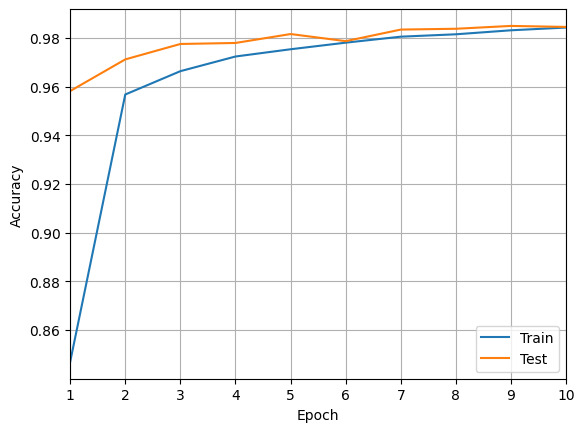

In [17]:
# Plot Accuracy vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['accuracy'])
plt.plot(epochRange,hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

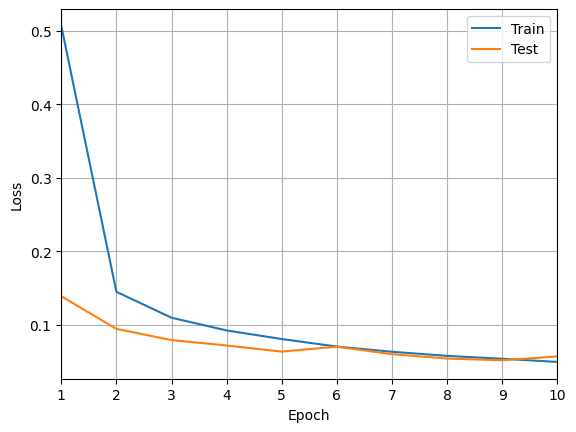

In [18]:
# Plot Loss vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['loss'])
plt.plot(epochRange,hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

## **Model 2:** Tuning Hyperparameters to compare the results

In [ ]:
model = Sequential()  # Linear stacking of layers

# Convolution Layer 1: 16 filters, kernel size 4x4, relu activation, same padding, stride 1
model.add(Conv2D(16, (5, 5), activation='relu', padding='same', strides=(2, 2), input_shape=(28, 28, 1)))

# MaxPooling: pool size 3, stride 1
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

# Convolution Layer 2: 32 filters, kernel size 2x2, relu activation, valid padding, stride 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(1, 1)))

# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten final feature matrix into a 1d array
model.add(Flatten())

# Fully Connected Layer: 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Dropout layer, 0.3 rate
model.add(Dropout(0.3))

# Final output dense Layer
model.add(Dense(15, activation='softmax'))

# Compile the model with sparse_categorical_crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,295 (223.81 KB)

 Trainable params: 57,295 (223.81 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Conv1: 3x3 kernels, one for each the single channel, 8 such filters and 8 biases
print('Conv1: ',4*4*1*16 + 16)
# Conv2: 3x3 kernels, one for each of the 8 channels, 16 such filters and 16 biases
print('Conv2: ',2*2*16*32 + 32)
# input to dense layer
print('Flatten:', 5*5*32)
# 400 inputs, 1 bias connected to each of 64 units in dense layer
print('Dense1: ',800*64+64)
# 64 inputs, 1 bias connected to each of 10 units in output layer
print('Dense2: ',64*15+15)

Conv1:  272
Conv2:  2080
Flatten: 800
Dense1:  51264
Dense2:  975


In [23]:
# Train the model
batch_size=512
epochs=50
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4258 - loss: 1.7088 - val_accuracy: 0.9445 - val_loss: 0.1937
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9188 - loss: 0.2709 - val_accuracy: 0.9669 - val_loss: 0.1131
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9466 - loss: 0.1755 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9580 - loss: 0.1401 - val_accuracy: 0.9783 - val_loss: 0.0727
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9659 - loss: 0.1138 - val_accuracy: 0.9803 - val_loss: 0.0656
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9696 - loss: 0.1034 - val_accuracy: 0.9823 - val_loss: 0.0592
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9715 - loss: 0.0988 - val_accuracy: 0.9829 - val_loss: 0.0581
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9730 - loss: 0.0912 - val_accuracy: 0.9829 - v

In [24]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026041304692626
Test accuracy: 0.9925000071525574


In [25]:
# make one prediction
print('Actual class:',y_test[0])
print('Class Probabilities:')
model.predict(X_test[0].reshape(1,28,28,1))

Actual class: 7
Class Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[2.8768688e-16, 6.5929762e-11, 5.4854382e-10, 2.4497986e-06,
        6.1574552e-13, 3.1247258e-11, 5.2935893e-17, 9.9999750e-01,
        1.7962225e-10, 3.3646845e-08, 1.1099872e-15, 1.1144214e-14,
        3.6782978e-14, 4.0814453e-12, 1.2796751e-15]], dtype=float32)

In [26]:
import numpy as np
yhat_test = np.argmax(model.predict(X_test),axis=-1)
print(yhat_test[0:10])
print(y_test[0:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
m2Acc = float(accuracy_score(y_test, yhat_test))*100,'%'
print(m2Acc[0], m2Acc[1])

Accuracy:
99.25 %


In [28]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion Matrix:
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1130    1    1    1    0    1    0    1    0]
 [   1    1 1026    1    0    0    0    2    1    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    3    0  884    2    1    0    1]
 [   2    3    0    0    3    1  948    0    1    0]
 [   1    2    2    0    0    0    0 1017    1    5]
 [   1    0    1    0    0    0    0    0  971    1]
 [   1    0    0    1    4    3    0    3   11  986]]


In [29]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

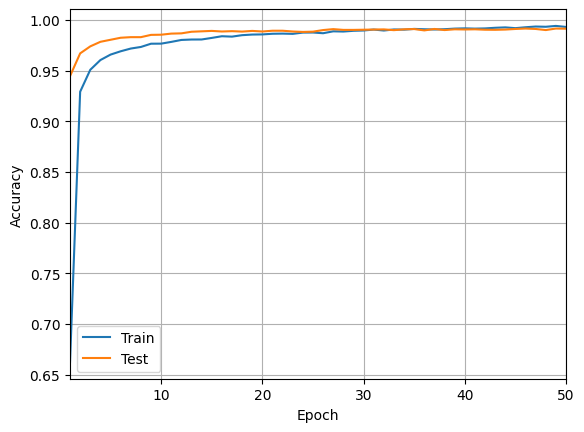

In [30]:
# Plot Accuracy vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['accuracy'])
plt.plot(epochRange,hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

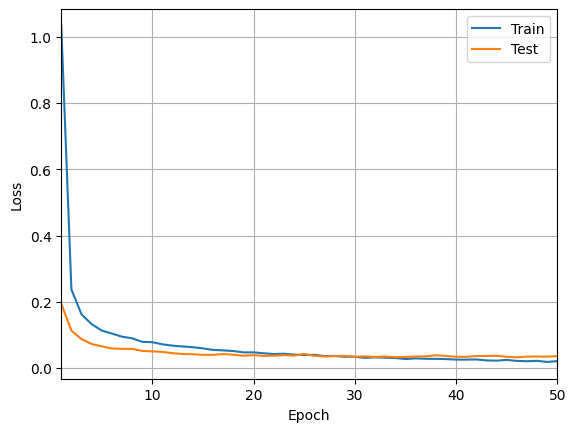

In [31]:
# Plot Loss vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['loss'])
plt.plot(epochRange,hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

In [32]:
# Model Evaluation
import pandas as pd
model_performance = pd.DataFrame(columns=['Accuracy'])

In [33]:
model_performance.loc['Model 1'] = [m1Acc[0]]
model_performance.loc['Model 2'] = [m2Acc[0]]

In [34]:
# Evaluation and Display
model_performance.fillna(.90, inplace=True)
formatted_performance = model_performance.applymap(lambda x: '{:.2%}'.format(x))
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({
                                                                     'Accuracy': '{:}%'
                                                                    })

/var/folders/sg/15vt0hhd7rx1sr7r_0lsbkpm0000gn/T/ipykernel_2433/3310170857.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_performance = model_performance.applymap(lambda x: '{:.2%}'.format(x))


,Accuracy
Model 1,98.66%
Model 2,99.25%
